In [57]:
import pandas as pd
import numpy as np

In [58]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Divija\OneDrive\Desktop\netflix\netflix_titles.csv',encoding='latin1')


# Display basic info
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Check null values
df.isnull().sum()

# Drop rows with too many missing values or fill them
df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Not Specified")
df['date_added'] = df['date_added'].ffill()  # instead of deprecated fillna(method='ffill')
df['rating'] = df['rating'].fillna("Not Rated")


# Confirm
df.isnull().sum()


show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [60]:
# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Create new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



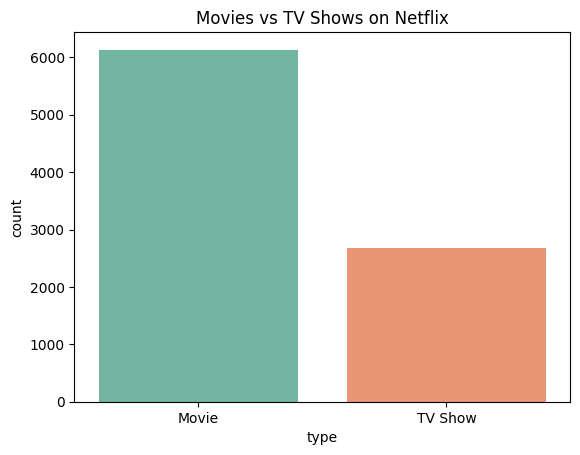

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='Set2',hue='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


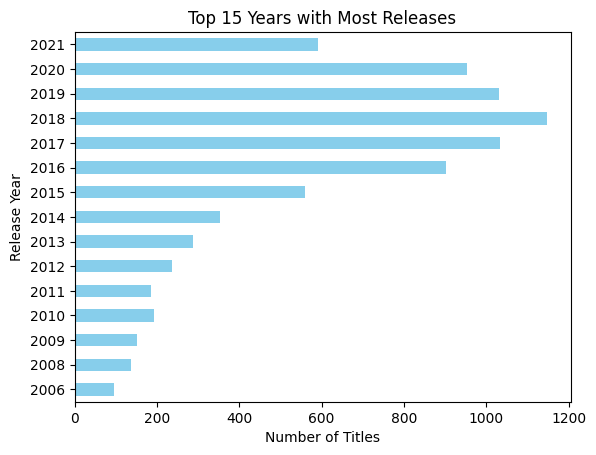

In [62]:
df_year = df['release_year'].value_counts().head(15).sort_index()

df_year.plot(kind='barh', color='skyblue')
plt.title("Top 15 Years with Most Releases")
plt.xlabel("Number of Titles")
plt.ylabel("Release Year")
plt.show()


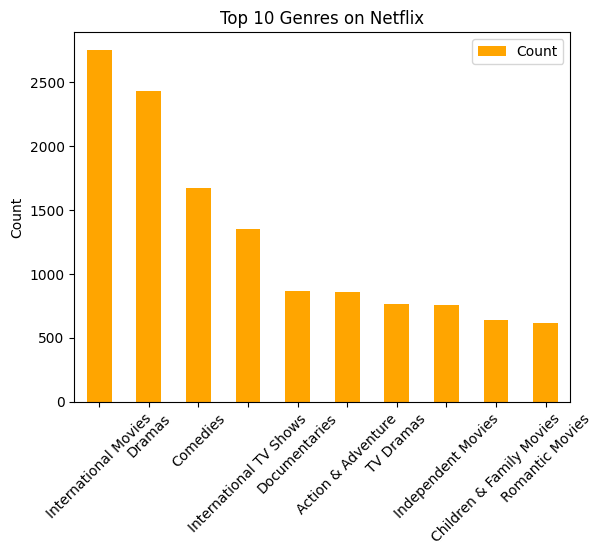

In [63]:
# Split multiple genres
from collections import Counter

genre_counter = Counter()
for genre_list in df['listed_in']:
    for genre in genre_list.split(', '):
        genre_counter[genre] += 1

# Plot
genre_df = pd.DataFrame.from_dict(genre_counter, orient='index', columns=['Count'])
genre_df.sort_values(by='Count', ascending=False).head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


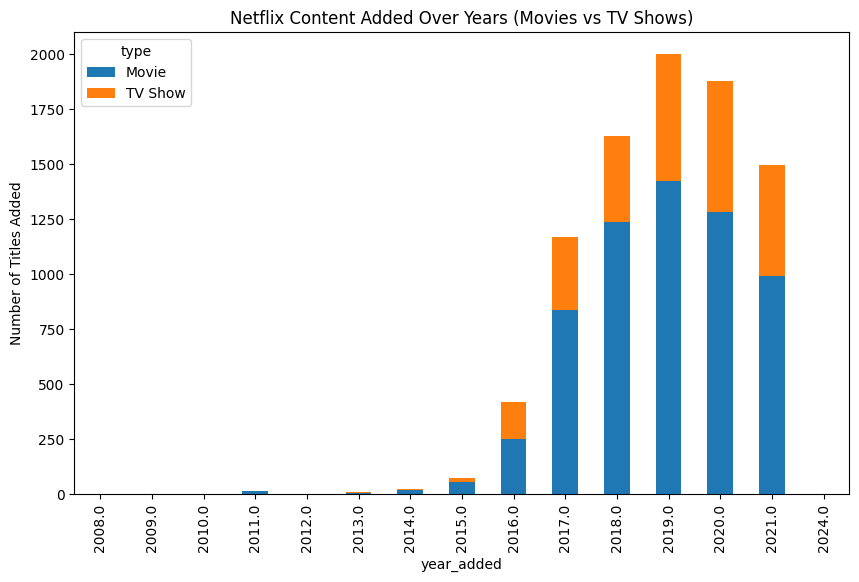

In [64]:
df_temp = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
df_temp.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Netflix Content Added Over Years (Movies vs TV Shows)")
plt.ylabel("Number of Titles Added")
plt.show()


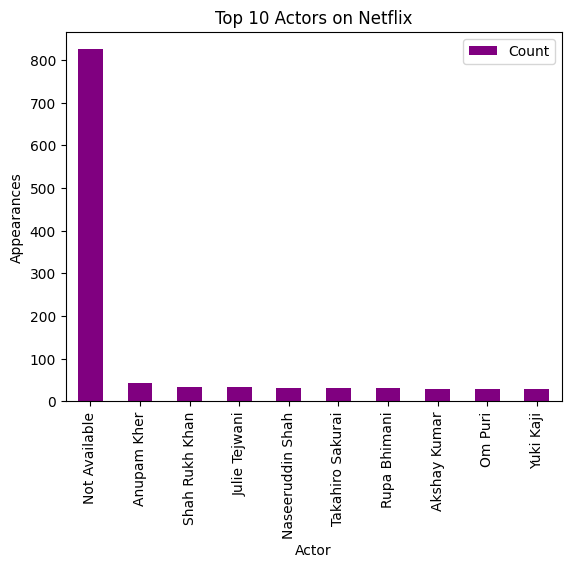

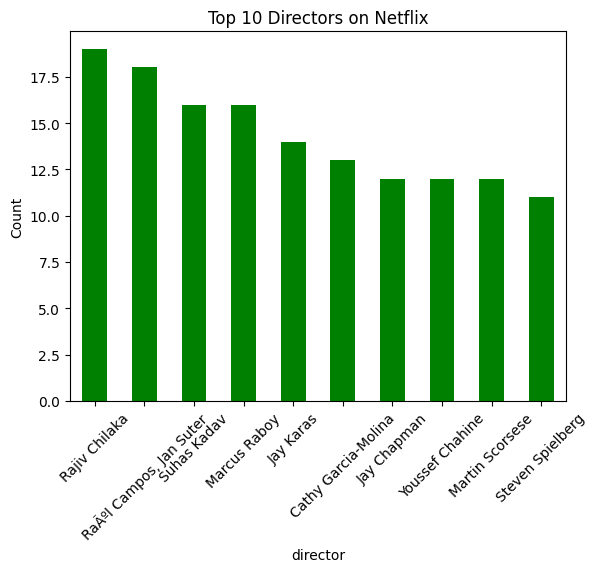

In [65]:
# Top 10 Actors
actor_counter = Counter()
for cast_list in df['cast'].dropna():
    for actor in cast_list.split(', '):
        actor_counter[actor] += 1

pd.DataFrame(actor_counter.most_common(10), columns=['Actor', 'Count']).set_index('Actor').plot(kind='bar', color='purple')
plt.title("Top 10 Actors on Netflix")
plt.ylabel("Appearances")
plt.show()

# Top 10 Directors
top_directors = df[df['director'] != "Not Available"]['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='green')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
